# Extended Data Figure 4 - Ye et al. 2023

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['axes.labelsize'] = 17  # for x and y labels
plt.rcParams['xtick.labelsize'] = 17 # for x axis tick labels
plt.rcParams['ytick.labelsize'] = 17 # for y axis tick labels
plt.rcParams['axes.titlesize'] = 17

In [10]:
rename_dict = {'swimming_ole': 'Kiehn_Lab_Swimming',
           'openfield_ole': 'Kiehn_Lab_Openfield',
           'treadmill_ole': 'Kiehn_Lab_Treadmill',
           'MackenzieMausHaus': 'MausHaus',
           'daniel3mouse': 'TriMice',
           'dlc-openfield': 'DLC_Openfield',
           'TwoWhiteMice_GoldenLab': 'WhiteMice',
           'ChanLab': 'BlackMice'
           }

temp = pd.read_hdf('../data/Figure1/openfield_ratios.h5')


unbalanced_zeroshot = temp.loc['unbalanced_zeroshot', '600000']  # .mean(axis=0)


zeroshot_with_mask = unbalanced_zeroshot['RMSE']

/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_24860/1315487532.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  unbalanced_zeroshot = temp.loc['unbalanced_zeroshot', '600000']  # .mean(axis=0)


## Ablation study on SuperAnimap-TopviewMouse, with or without gradient masking

/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_24860/3744010253.py:16: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.pointplot(data=df, x="method", y="RMSE", hue='method', color='grey', errorbar=None)
/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_24860/3744010253.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.stripplot(data=df, x="method", y="RMSE",  hue='method', color='grey', alpha = .5)


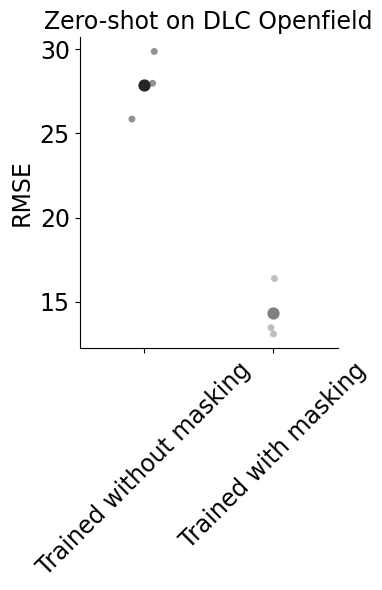

In [11]:
no_mask_zeroshot = pd.read_csv('../data/Extended_Figure4/dlc_openfield_no_masking_zeroshot.csv')
no_mask_zeroshot = no_mask_zeroshot.iloc[:, 1:]
mask_zeroshot = zeroshot_with_mask.to_frame().reset_index()
no_mask_zeroshot['method'] = 'Trained without masking'

mask_zeroshot.columns = ['Shuffle', 'RMSE']
mask_zeroshot['method'] = 'Trained with masking'


df = pd.concat((no_mask_zeroshot, mask_zeroshot),ignore_index=True)


# Create a bar plot
plt.figure(figsize=(4, 6))
#plt.bar(methods, mean_rmse, yerr=std_error, capsize=5, color=['grey', 'grey'])
sns.pointplot(data=df, x="method", y="RMSE", hue='method', color='grey', errorbar=None)
sns.stripplot(data=df, x="method", y="RMSE",  hue='method', color='grey', alpha = .5)

# Adding labels and title

plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.title("Zero-shot on DLC Openfield")
plt.xlabel('')
sns.despine()  # Removing top and right spines
plt.tight_layout()
ax = plt.gca()  # Get the current axes instance
# Show the plot
plt.savefig('masking_ablation_study.svg', dpi = 300, transparent = True)

## Ablation study. To measure catastrophic forgetting in terms of keypoint-dropping between naive fine-tuning and memory replay

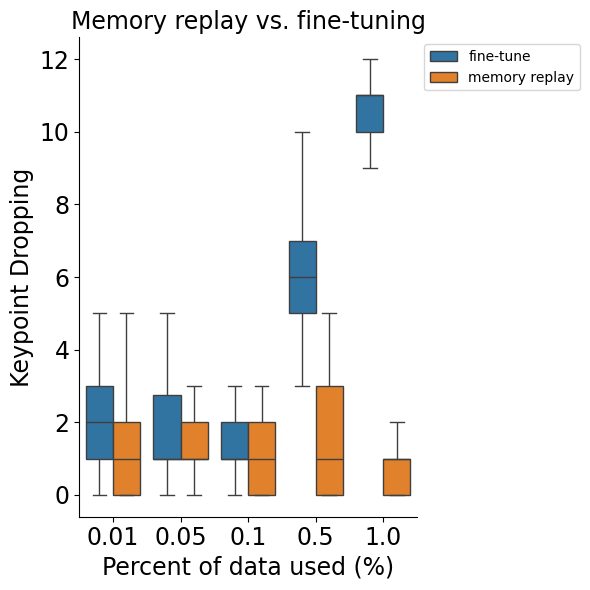

In [12]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('../data/Extended_Figure4/TD_dlc_openfield_memory_replay_ablation_study.csv')

df['method'] = df['method'].replace({'memory-replay' : 'memory replay', 'finetune': 'fine-tune'})

# Filter the data for 'finetune' and 'memory-replay' methods
filtered_data = df


# Expand the 'keypoint_dropping' lists into individual rows
# Assuming 'keypoint_dropping' is a column of lists or similar structure
rows = []
for index, row in filtered_data.iterrows():
    if pd.notna(row['keypoint_dropping']):  # Ensure the value is not NaN
        keypoint_list = ast.literal_eval(row['keypoint_dropping'])

        for keypoint_value in keypoint_list:
            rows.append({
                'method': row['method'],
                'training_ratio': row['training_ratio'],
                'keypoint_dropping': keypoint_value
            })

expanded_data = pd.concat([pd.DataFrame([row]) for row in rows], ignore_index=True)

# Creating the box plot with the expanded data
plt.figure(figsize=(6, 6))
sns.boxplot(x='training_ratio', y='keypoint_dropping', hue='method', data=expanded_data, showfliers = False)
plt.title('Memory replay vs. fine-tuning')
plt.xlabel('Percent of data used (%)')
plt.ylabel('Keypoint Dropping')
plt.legend(title='Method')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
sns.despine()
plt.savefig('memory_replay_ablation.svg', transparent = True, dpi = 300)

## TopDown-TokenPose-L on DLC Openfield and TriMouse

/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_24860/2276729344.py:16: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.pointplot(data=result, x="dataset", y="rmse", hue='dataset', color = 'grey', errorbar=None )
/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_24860/2276729344.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.stripplot(data=result, x="dataset", y="rmse", hue='dataset', alpha = .5, color = 'grey', jitter=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


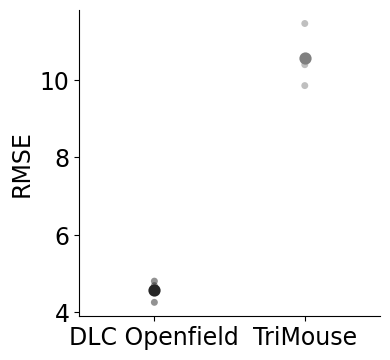

In [13]:
openfield_df = pd.read_csv('../data/Extended_Figure4/tokenpose_L/dlc_openfield.csv')
openfield_df = openfield_df.iloc[:, 1:]
openfield_df['dataset'] = 'DLC Openfield'

plt.figure(figsize=(4, 4))
trimouse_df = pd.read_csv('../data/Extended_Figure4/tokenpose_L/trimouse.csv')
trimouse_df = trimouse_df.iloc[:, 1:]
trimouse_df['dataset'] = 'TriMouse'



result = pd.concat([openfield_df, trimouse_df], axis=0)
result = result[result['method'] == 'zeroshot']


sns.pointplot(data=result, x="dataset", y="rmse", hue='dataset', color = 'grey', errorbar=None )
sns.stripplot(data=result, x="dataset", y="rmse", hue='dataset', alpha = .5, color = 'grey', jitter=False)
plt.ylabel('RMSE')
plt.legend().set_visible(False)
sns.despine()
plt.tight_layout()
plt.xlabel('')

plt.savefig('tokenpose_mice_scatter.png', dpi = 300, transparent = True)


## TopDown-TokenPose-L on Horse-10 and iRodent

/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_24860/2283022742.py:20: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.pointplot(data=result, x="dataset", y="mAP", hue='dataset', color = 'grey',  errorbar=None)
/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_24860/2283022742.py:21: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.stripplot(data=result, x="dataset", y="mAP", hue='dataset', alpha = .5, color = 'grey', jitter=False, legend = False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     method pretrain_model  training_ratio   level_3       mAP    NE_iid  \
0  zeroshot    SuperAnimal             1.0  shuffle1  0.693018  0.246038   
1  zeroshot    SuperAnimal             1.0  shuffle2  0.692155  0.242307   
2  zeroshot    SuperAnimal             1.0  shuffle3  0.684144  0.228288   

     NE_ood      rmse   dataset  
0  0.229642  4.064050  Horse-10  
1  0.229750  4.007541  Horse-10  
2  0.239317  4.171900  Horse-10  


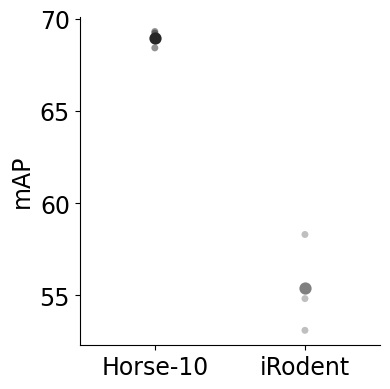

In [14]:
horse_df = pd.read_csv('../data/Extended_Figure4/tokenpose_L/horse10.csv')
horse_df = horse_df.iloc[:, 1:]
horse_df['dataset'] = 'Horse-10'

plt.figure(figsize=(4, 4))
print (horse_df)

rodent_df = pd.read_csv('../data/Extended_Figure4/tokenpose_L/rodent.csv')
rodent_df = rodent_df.iloc[:, 1:]
rodent_df['dataset'] = 'iRodent'

rodent_df['mAP']*=100
horse_df['mAP']*=100


result = pd.concat([horse_df, rodent_df], axis=0)
result = result[result['method'] == 'zeroshot']


sns.pointplot(data=result, x="dataset", y="mAP", hue='dataset', color = 'grey',  errorbar=None)
sns.stripplot(data=result, x="dataset", y="mAP", hue='dataset', alpha = .5, color = 'grey', jitter=False, legend = False)
plt.legend().set_visible(False)
plt.xlabel('')
sns.despine()
plt.tight_layout()

plt.savefig('tokenpose_quadruped_scatter.png', transparent = True, dpi = 300)
